(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                      

C:\Users\nidhi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


981/981 [==============================] - 18s 18ms/step - loss: 1.5321 - accuracy: 0.5663 - val_loss: 0.3457 - val_accuracy: 0.9245
Epoch 2/15
981/981 [==============================] - 17s 17ms/step - loss: 0.4029 - accuracy: 0.8753 - val_loss: 0.1204 - val_accuracy: 0.9725
Epoch 3/15
981/981 [==============================] - 16s 16ms/step - loss: 0.2465 - accuracy: 0.9234 - val_loss: 0.0652 - val_accuracy: 0.9851
Epoch 4/15
981/981 [==============================] - 16s 16ms/step - loss: 0.1850 - accuracy: 0.9435 - val_loss: 0.0532 - val_accuracy: 0.9880
Epoch 5/15
981/981 [==============================] - 15s 15ms/step - loss: 0.1532 - accuracy: 0.9519 - val_loss: 0.0397 - val_accuracy: 0.9901
Epoch 6/15
981/981 [==============================] - 16s 16ms/step - loss: 0.1332 - accuracy: 0.9587 - val_loss: 0.0350 - val_accuracy: 0.9923
Epoch 7/15
981/981 [==============================] - 16s 16ms/step - loss: 0.1149 - accuracy: 0.9659 - val_loss: 0.0250 - val_accuracy: 0.9943
Epo

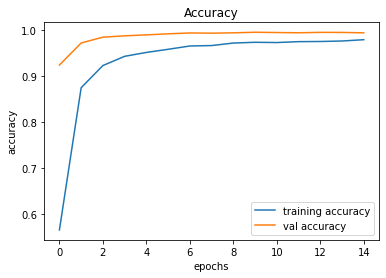

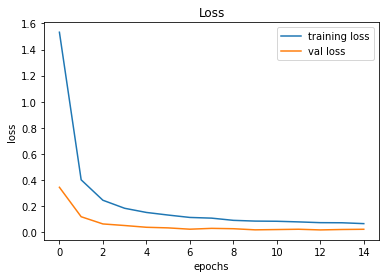

395/395 [==============================] - 2s 6ms/step
Confusion Matrix:
[[ 58   1   0 ...   0   0   0]
 [  1 714   1 ...   0   0   0]
 [  0  38 705 ...   0   0   0]
 ...
 [  0   1   0 ...  88   0   0]
 [  0   0   0 ...   0  52   0]
 [  0   0   0 ...   0   2  87]]
Accuracy: 0.964450
Precision: 0.953031
Recall: 0.949484
F1 score: 0.949950


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()


learning_rate = 0.001
opt = Adam(lr=learning_rate)

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                      

C:\Users\nidhi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
981/981 [==============================] - 16s 16ms/step - loss: 3.5098 - accuracy: 0.0530 - val_loss: 3.4803 - val_accuracy: 0.0632
Epoch 2/15
981/981 [==============================] - 15s 15ms/step - loss: 3.4944 - accuracy: 0.0550 - val_loss: 3.4800 - val_accuracy: 0.0574
Epoch 3/15
981/981 [==============================] - 15s 15ms/step - loss: 3.4905 - accuracy: 0.0562 - val_loss: 3.4789 - val_accuracy: 0.0632
Epoch 4/15
981/981 [==============================] - 15s 15ms/step - loss: 3.4907 - accuracy: 0.0546 - val_loss: 3.4811 - val_accuracy: 0.0576
Epoch 5/15
981/981 [==============================] - 15s 15ms/step - loss: 3.4901 - accuracy: 0.0572 - val_loss: 3.4786 - val_accuracy: 0.0632
Epoch 6/15
981/981 [==============================] - 15s 15ms/step - loss: 3.4904 - accuracy: 0.0538 - val_loss: 3.4828 - val_accuracy: 0.0574
Epoch 7/15
981/981 [==============================] - 15s 15ms/step - loss: 3.4908 - accuracy: 0.0543 - val_loss: 3.4805 - val_accuracy:

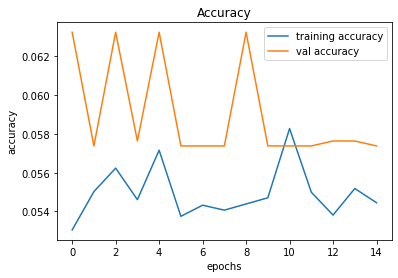

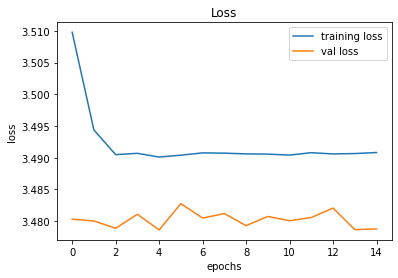

395/395 [==============================] - 3s 6ms/step
Confusion Matrix:
[[  0   0  60 ...   0   0   0]
 [  0   0 720 ...   0   0   0]
 [  0   0 750 ...   0   0   0]
 ...
 [  0   0  90 ...   0   0   0]
 [  0   0  60 ...   0   0   0]
 [  0   0  90 ...   0   0   0]]
Accuracy: 0.059382
Precision: 0.001381
Recall: 0.023256
F1 score: 0.002607


C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()


learning_rate = 0.01
opt = Adam(lr=learning_rate)

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                      

C:\Users\nidhi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


981/981 [==============================] - 16s 16ms/step - loss: 3.9005 - accuracy: 0.0536 - val_loss: 3.4915 - val_accuracy: 0.0533
Epoch 2/15
981/981 [==============================] - 15s 16ms/step - loss: 3.5008 - accuracy: 0.0555 - val_loss: 3.4837 - val_accuracy: 0.0576
Epoch 3/15
981/981 [==============================] - 15s 15ms/step - loss: 3.5015 - accuracy: 0.0529 - val_loss: 3.4909 - val_accuracy: 0.0533
Epoch 4/15
981/981 [==============================] - 15s 15ms/step - loss: 3.5013 - accuracy: 0.0528 - val_loss: 3.4857 - val_accuracy: 0.0574
Epoch 5/15
981/981 [==============================] - 15s 16ms/step - loss: 3.5010 - accuracy: 0.0533 - val_loss: 3.4922 - val_accuracy: 0.0464
Epoch 6/15
981/981 [==============================] - 17s 17ms/step - loss: 3.5010 - accuracy: 0.0552 - val_loss: 3.4917 - val_accuracy: 0.0632
Epoch 7/15
981/981 [==============================] - 16s 16ms/step - loss: 3.5012 - accuracy: 0.0518 - val_loss: 3.4940 - val_accuracy: 0.0574
Epo

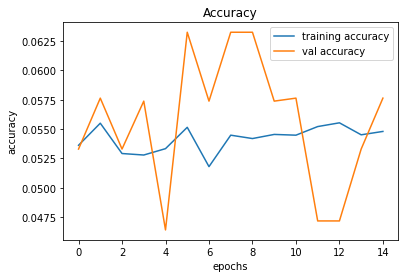

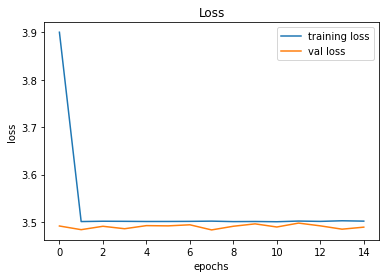

395/395 [==============================] - 3s 7ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.057007
Precision: 0.001326
Recall: 0.023256
F1 score: 0.002508


C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()


learning_rate = 0.05
opt = Adam(lr=learning_rate)

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                      

C:\Users\nidhi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
981/981 [==============================] - 17s 17ms/step - loss: 2790.8306 - accuracy: 0.0489 - val_loss: 3.5809 - val_accuracy: 0.0574
Epoch 2/15
981/981 [==============================] - 15s 15ms/step - loss: 5.2256 - accuracy: 0.0500 - val_loss: 3.5585 - val_accuracy: 0.0576
Epoch 3/15
981/981 [==============================] - 15s 15ms/step - loss: 3.6144 - accuracy: 0.0473 - val_loss: 3.6276 - val_accuracy: 0.0574
Epoch 4/15
981/981 [==============================] - 15s 16ms/step - loss: 3.6099 - accuracy: 0.0503 - val_loss: 3.5817 - val_accuracy: 0.0574
Epoch 5/15
981/981 [==============================] - 15s 16ms/step - loss: 3.6126 - accuracy: 0.0503 - val_loss: 3.6089 - val_accuracy: 0.0574
Epoch 6/15
981/981 [==============================] - 15s 15ms/step - loss: 3.6098 - accuracy: 0.0538 - val_loss: 3.5734 - val_accuracy: 0.0301
Epoch 7/15
981/981 [==============================] - 15s 15ms/step - loss: 3.6101 - accuracy: 0.0503 - val_loss: 3.6249 - val_accura

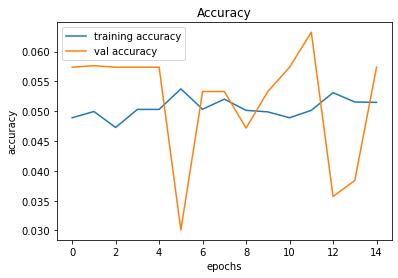

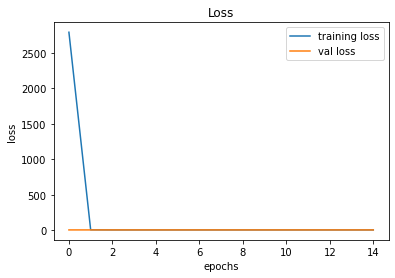

395/395 [==============================] - 4s 9ms/step
Confusion Matrix:
[[  0   0  60 ...   0   0   0]
 [  0   0 720 ...   0   0   0]
 [  0   0 750 ...   0   0   0]
 ...
 [  0   0  90 ...   0   0   0]
 [  0   0  60 ...   0   0   0]
 [  0   0  90 ...   0   0   0]]
Accuracy: 0.059382
Precision: 0.001381
Recall: 0.023256
F1 score: 0.002607


C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()


learning_rate = 0.5
opt = Adam(lr=learning_rate)

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                      

C:\Users\nidhi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


981/981 [==============================] - 17s 17ms/step - loss: 34921.2695 - accuracy: 0.0472 - val_loss: 3.7595 - val_accuracy: 0.0533
Epoch 2/15
981/981 [==============================] - 16s 16ms/step - loss: 3.7339 - accuracy: 0.0489 - val_loss: 3.6998 - val_accuracy: 0.0472
Epoch 3/15
981/981 [==============================] - 16s 16ms/step - loss: 3.7322 - accuracy: 0.0467 - val_loss: 3.7529 - val_accuracy: 0.0574
Epoch 4/15
981/981 [==============================] - 16s 16ms/step - loss: 3.7294 - accuracy: 0.0484 - val_loss: 3.7059 - val_accuracy: 0.0632
Epoch 5/15
981/981 [==============================] - 17s 17ms/step - loss: 3.7291 - accuracy: 0.0476 - val_loss: 3.7292 - val_accuracy: 0.0384
Epoch 6/15
981/981 [==============================] - 16s 16ms/step - loss: 3.7332 - accuracy: 0.0496 - val_loss: 3.6853 - val_accuracy: 0.0472
Epoch 7/15
981/981 [==============================] - 16s 16ms/step - loss: 3.7241 - accuracy: 0.0479 - val_loss: 3.7013 - val_accuracy: 0.0342

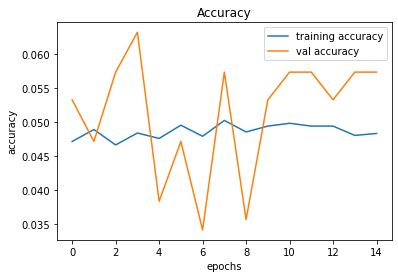

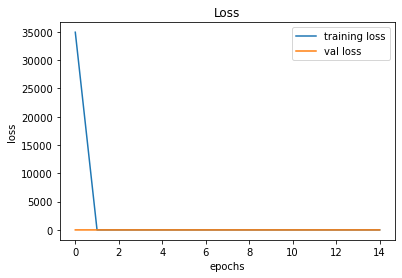

395/395 [==============================] - 2s 6ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.054632
Precision: 0.001271
Recall: 0.023256
F1 score: 0.002409


C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()


learning_rate = 1
opt = Adam(lr=learning_rate)

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                      

C:\Users\nidhi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
981/981 [==============================] - 16s 15ms/step - loss: 29812.3164 - accuracy: 0.0484 - val_loss: 3.8109 - val_accuracy: 0.0464
Epoch 2/15
981/981 [==============================] - 17s 17ms/step - loss: 3.8386 - accuracy: 0.0461 - val_loss: 3.7835 - val_accuracy: 0.0533
Epoch 3/15
981/981 [==============================] - 17s 17ms/step - loss: 3.8306 - accuracy: 0.0474 - val_loss: 3.8659 - val_accuracy: 0.0472
Epoch 4/15
981/981 [==============================] - 15s 16ms/step - loss: 3.8310 - accuracy: 0.0489 - val_loss: 3.9080 - val_accuracy: 0.0533
Epoch 5/15
981/981 [==============================] - 16s 16ms/step - loss: 3.8483 - accuracy: 0.0495 - val_loss: 3.8206 - val_accuracy: 0.0472
Epoch 6/15
981/981 [==============================] - 17s 17ms/step - loss: 3.8485 - accuracy: 0.0479 - val_loss: 3.8318 - val_accuracy: 0.0574
Epoch 7/15
981/981 [==============================] - 17s 17ms/step - loss: 3.8420 - accuracy: 0.0464 - val_loss: 3.8747 - val_accur

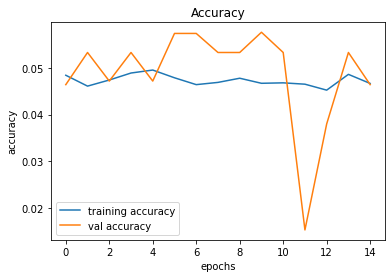

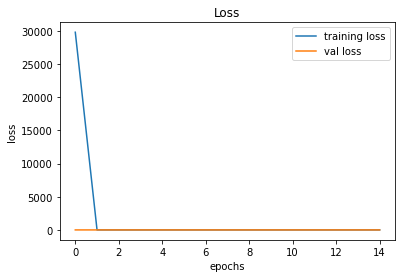

395/395 [==============================] - 3s 7ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.049881
Precision: 0.001160
Recall: 0.023256
F1 score: 0.002210


C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()


learning_rate = 1.5
opt = Adam(lr=learning_rate)

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)



(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                      

C:\Users\nidhi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
981/981 [==============================] - 16s 15ms/step - loss: 24212006.0000 - accuracy: 0.0440 - val_loss: 5.0522 - val_accuracy: 0.0380
Epoch 2/15
981/981 [==============================] - 15s 15ms/step - loss: 4.6180 - accuracy: 0.0401 - val_loss: 6.2328 - val_accuracy: 0.0112
Epoch 3/15
981/981 [==============================] - 15s 15ms/step - loss: 4.6225 - accuracy: 0.0433 - val_loss: 4.5185 - val_accuracy: 0.0204
Epoch 4/15
981/981 [==============================] - 15s 15ms/step - loss: 4.6601 - accuracy: 0.0423 - val_loss: 4.3281 - val_accuracy: 0.0176
Epoch 5/15
981/981 [==============================] - 15s 15ms/step - loss: 4.6111 - accuracy: 0.0428 - val_loss: 4.7312 - val_accuracy: 0.0080
Epoch 6/15
981/981 [==============================] - 15s 15ms/step - loss: 4.6077 - accuracy: 0.0430 - val_loss: 4.8891 - val_accuracy: 0.0295
Epoch 7/15
981/981 [==============================] - 15s 15ms/step - loss: 4.6213 - accuracy: 0.0435 - val_loss: 5.5923 - val_ac

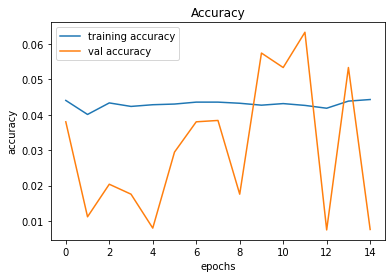

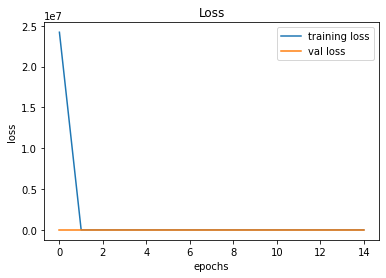

395/395 [==============================] - 4s 10ms/step
Confusion Matrix:
[[  0   0   0 ...  60   0   0]
 [  0   0   0 ... 720   0   0]
 [  0   0   0 ... 750   0   0]
 ...
 [  0   0   0 ...  90   0   0]
 [  0   0   0 ...  60   0   0]
 [  0   0   0 ...  90   0   0]]
Accuracy: 0.007126
Precision: 0.000166
Recall: 0.023256
F1 score: 0.000329


C:\Users\nidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_folder = 'data'

# Loading training dataset
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalizing data via Min-Max normalizer
scaler = MinMaxScaler()
ascolumns = data.reshape(-1, 3)
t = scaler.fit_transform(ascolumns)
data = t.reshape(data.shape)
print(data.shape, labels.shape)

# Splitting training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()


learning_rate = 5
opt = Adam(lr=learning_rate)

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save('traffic_classifier.h5')

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model
path = os.path.join(cur_path,data_folder)
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

# Normalizing test set
ascolumns = X_test.reshape(-1, 3)
t = scaler.transform(ascolumns)
X_test = t.reshape(X_test.shape)

# Predicting on test set
pred = np.argmax(model.predict(X_test),axis=1)

# Performance evaluation
cm = confusion_matrix(labels, pred)
print('Confusion Matrix:')
print(cm)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(labels, pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(labels, pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(labels, pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(labels, pred, average='macro')
print('F1 score: %f' % f1)

